## Import the modules

In [185]:
import fastf1 as ff1 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
import gradio as gr
import seaborn as sns
import numpy as np
import gradio as gr

## Make a Dicitonary on the file locations

In [186]:
grand_prix_files = {
    "Austrian Grand Prix": "race_stints_2024/austrian_grand_prix_stints.csv",
    "British Grand Prix": "race_stints_2024/british_grand_prix_stints.csv",
    "Bahrain Grand Prix": "race_stints_2024/bahrain_grand_prix_stints.csv",
    "Saudi Arabian Grand Prix": "race_stints_2024/saudi_arabian_grand_prix_stints.csv",
    "Australian Grand Prix": "race_stints_2024/australian_grand_prix_stints.csv",
    "Emilia Romagna Grand Prix": "race_stints_2024/emilia_romagna_grand_prix_stints.csv",
    "Monaco Grand Prix": "race_stints_2024/monaco_grand_prix_stints.csv",
    "Spanish Grand Prix": "race_stints_2024/spanish_grand_prix_stints.csv",
    "Canadian Grand Prix": "race_stints_2024/canadian_grand_prix_stints.csv",
    "French Grand Prix": "race_stints_2024/french_grand_prix_stints.csv",
    "Hungarian Grand Prix": "race_stints_2024/hungarian_grand_prix_stints.csv",
    "Belgian Grand Prix": "race_stints_2024/belgian_grand_prix_stints.csv",
    "Dutch Grand Prix": "race_stints_2024/dutch_grand_prix_stints.csv",
    "Italian Grand Prix": "race_stints_2024/italian_grand_prix_stints.csv",
    "Singapore Grand Prix": "race_stints_2024/singapore_grand_prix_stints.csv",
    "Japanese Grand Prix": "race_stints_2024/japanese_grand_prix_stints.csv",
    "United States Grand Prix": "race_stints_2024/united_states_grand_prix_stints.csv",
    "Mexican Grand Prix": "race_stints_2024/mexican_grand_prix_stints.csv",
    "Brazilian Grand Prix": "race_stints_2024/brazilian_grand_prix_stints.csv",
    "Qatar Grand Prix": "race_stints_2024/qatar_grand_prix_stints.csv",
    "Abu Dhabi Grand Prix": "race_stints_2024/abu_dhabi_grand_prix_stints.csv",
    "Miami Grand Prix": "race_stints_2024/miami_grand_prix_stints.csv",
    "Las Vegas Grand Prix": "race_stints_2024/las_vegas_grand_prix_stints.csv"
}

## Input the Grand Prix

In [187]:
# grand_prix = input("Enter a 2024 Grand Prix")
grand_prix = "Abu Dhabi Grand Prix"
grand_prix_files[grand_prix]
print(f'Predicting the Optimal Pitstop for the:{grand_prix}')

Predicting the Optimal Pitstop for the:Abu Dhabi Grand Prix


## Load and read the selected file

In [188]:
file_path = grand_prix_files[grand_prix] #Find the file path for the selected grand prix
data = pd.read_csv(file_path) #Read the data from the file
print(data.head()) #Print the first 5 rows of the data

  Driver  Stint Compound  Laps
0    ALB    1.0   MEDIUM    12
1    ALB    2.0     HARD    45
2    ALO    1.0   MEDIUM    13
3    ALO    2.0     HARD    24
4    ALO    3.0     HARD    21


## Pre-process and map the data

In [189]:
# Mapping the tyre compounds
compound_map = {
    "SOFT": 1,
    "MEDIUM": 2,
    "HARD": 3
}

data["Compound"] = data["Compound"].map(compound_map)

# Mapping the drivers
drivers_map = {
    "ALB": 1,  # Alexander Albon
    "ALO": 2,  # Fernando Alonso
    "BOT": 3,  # Valtteri Bottas
    "HAM": 4,  # Lewis Hamilton
    "HUL": 5,  # Nico Hulkenberg
    "LEC": 6,  # Charles Leclerc
    "PIA": 7,  # Oscar Piastri
    "NOR": 8,  # Lando Norris
    "PER": 9,  # Sergio Perez
    "RIC": 10, # Daniel Ricciardo
    "STR": 11, # Lance Stroll
    "TSU": 12, # Yuki Tsunoda
    "ZHO": 14, # Zhou Guanyu
    "GAS": 15, # Pierre Gasly
    "SAI": 16, # Carlos Sainz
    "VER": 17, # Max Verstappen
    "RUS": 18, # George Russell
    "OCO": 19, # Esteban Ocon
    "SAR": 20, # Logan Sargeant
    "MAG": 21, # Kevin Magnussen
    "LAW": 22, # Liam Lawson
    "COL": 23, # Franco Colapinto
    "DOO": 24, # Jack Doohan
    "BEA": 25  # Oliver Bearman
}

data["Driver"] = data["Driver"].map(drivers_map)

# Drop rows with NaN values in any column
data = data.dropna()

# Pre process into their respective variables
x = data[["Stint", "Compound", "Driver"]]
y = data["Laps"]

## Split the data 

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Choose the model and predict the data

In [191]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(predictions)

[16.61 22.59 16.61 23.98  8.33 27.83 26.91  7.89 30.05  7.89]


# Check accuracy of the data

In [192]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R2 Score: {r2*100:.2f}%')

Mean Squared Error: 84.65
Mean Absolute Error: 8.02
R2 Score: 52.85%


## Calculate the residuals to find the optimal lap to pit

In [193]:
# Calculate residuals
residuals = np.abs(y_test - predictions)

# Combine test data, predictions, and residuals into a DataFrame
results = x_test.copy()
results["Actual Laps"] = y_test
results["Predicted Laps"] = predictions
results["Residuals"] = residuals

# Find the optimal lap for each driver
optimal_laps = results.loc[results.groupby("Driver")["Residuals"].idxmin()]

print("Optimal Laps for Each Driver:")
print(optimal_laps)

# Sort the results by Driver and Residuals
results_sorted = results.sort_values(by=["Residuals"])


Optimal Laps for Each Driver:
    Stint  Compound  Driver  Actual Laps  Predicted Laps  Residuals
4     3.0         3       2           21           30.05       9.05
40    3.0         3      11           25           22.59       2.41
12    2.0         3      15           44           26.91      17.09
37    2.0         3      16           33           27.83       5.17
43    1.0         2      17           29           23.98       5.02
25    3.0         3      21            1            7.89       6.89
19    3.0         3      22            5            7.89       2.89


## Pick the Top 3 most Optimal laps

In [194]:
# Pick the top 3 values with the lowest residuals for each driver
top_3_optimal_laps = results_sorted.groupby("Residuals").head().reset_index(drop=True)

print("Top 3 Optimal Laps for Each Driver:")
print(top_3_optimal_laps)

Top 3 Optimal Laps for Each Driver:
   Stint  Compound  Driver  Actual Laps  Predicted Laps  Residuals
0    3.0         3      11           25           22.59       2.41
1    3.0         3      22            5            7.89       2.89
2    1.0         2      17           29           23.98       5.02
3    2.0         3      16           33           27.83       5.17
4    3.0         3      21            1            7.89       6.89
5    4.0         1      21           25           16.61       8.39
6    2.0         3      21           17            8.33       8.67
7    3.0         3       2           21           30.05       9.05
8    5.0         1      21            2           16.61      14.61
9    2.0         3      15           44           26.91      17.09


In [195]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R2 Score: {r2*100:.2f}%')

Mean Squared Error: 84.65
Mean Absolute Error: 8.02
R2 Score: 52.85%


## Plot the data

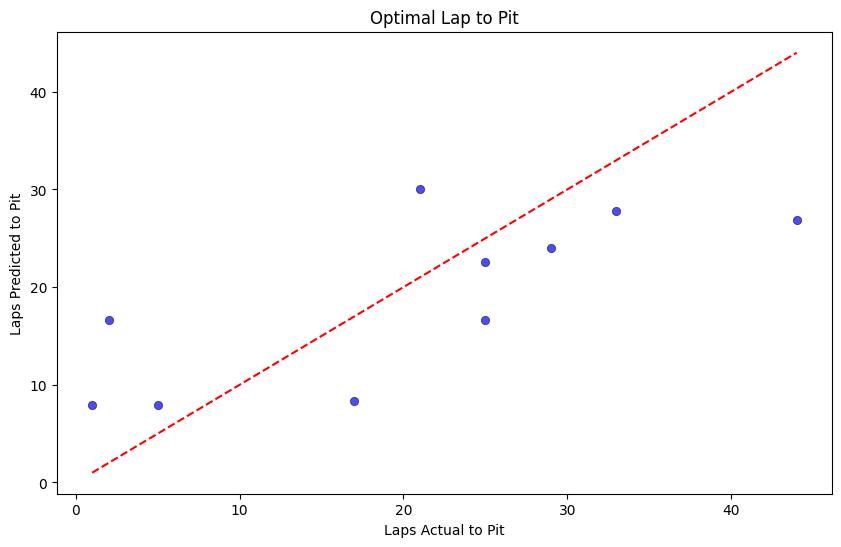

In [196]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.7, color='b', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Laps Actual to Pit')
plt.ylabel('Laps Predicted to Pit')
plt.title('Optimal Lap to Pit')
plt.show()

## Display the data with Gradio and make it interactive